In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

In [2]:
df = pd.read_excel(r"Copper_Set.xlsx")
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.0


In [3]:
df.shape

(181673, 14)

In [4]:
print(len(df['item_date'].unique()))
print(len(df['customer'].unique())) 
print(len(df['material_ref'].unique()))
print(len(df['product_ref'].unique())) 
print(len(df['delivery date'].unique()))  

253
1170
16564
33
29


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [6]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [7]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [8]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [9]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [10]:
df.shape

(181673, 14)

In [11]:
df['material_ref'].fillna('Unknow', inplace = True)
df = df.dropna()

In [12]:
dfr=df.copy()

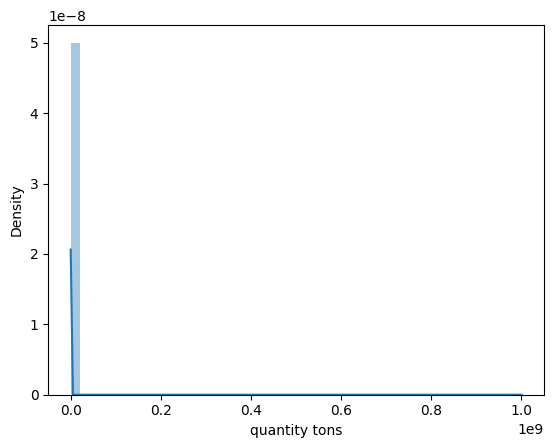

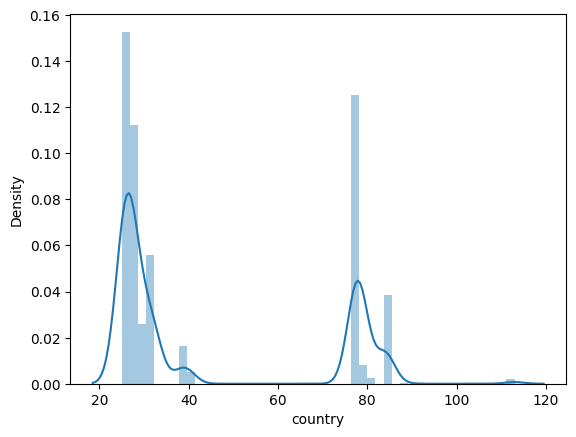

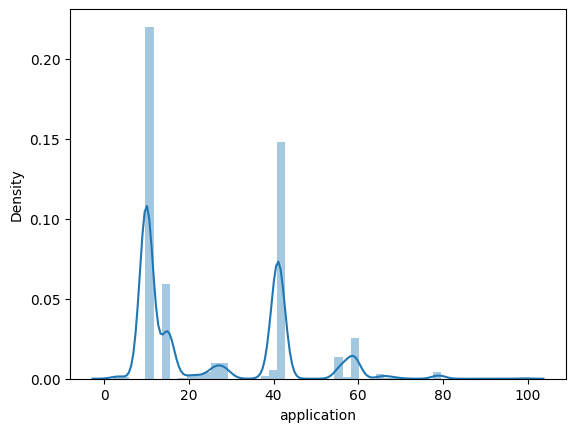

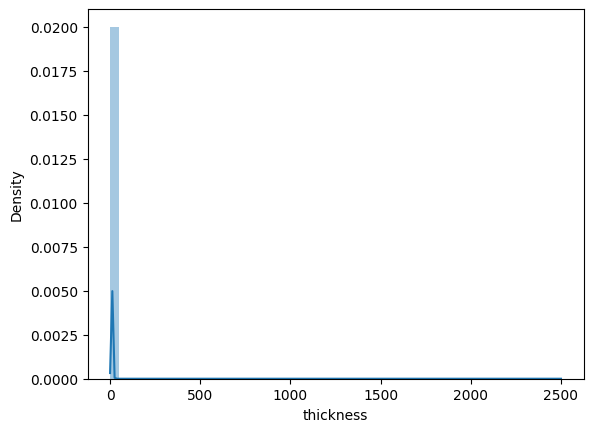

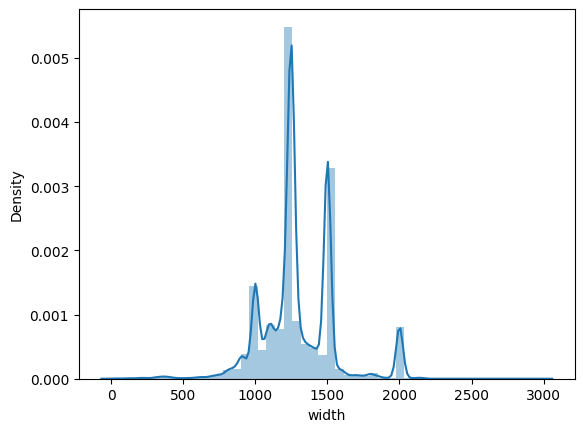

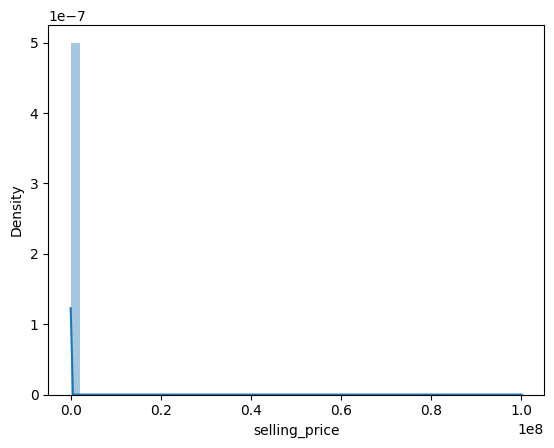

In [13]:
# ['quantity tons','selling_price','application','thickness','width', 'country']
# ['status','item type']

dfr['quantity tons']   # skewed
dfr['country']
dfr['application']
dfr['thickness']       # skewed
dfr['width']           
dfr['selling_price']   # skewed

import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(dfr['quantity tons'])
plt.show()
sns.distplot(dfr['country'])
plt.show()
sns.distplot(dfr['application'])
plt.show()
sns.distplot(dfr['thickness'])
plt.show()
sns.distplot(dfr['width'])
plt.show()
sns.distplot(dfr['selling_price'])
plt.show()

In [14]:

mask1 = dfr['selling_price'] <= 0
print(mask1.sum())
dfr.loc[mask1, 'selling_price'] = np.nan

mask1 = dfr['quantity tons'] <= 0
print(mask1.sum())
dfr.loc[mask1, 'quantity tons'] = np.nan

mask1 = dfr['thickness'] <= 0
print(mask1.sum())

7
4
0


In [15]:
dfr.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

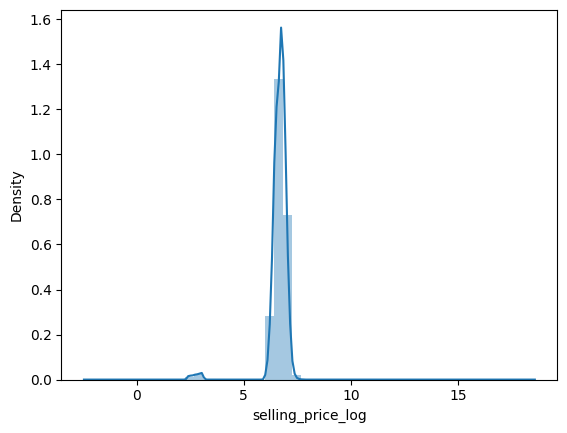

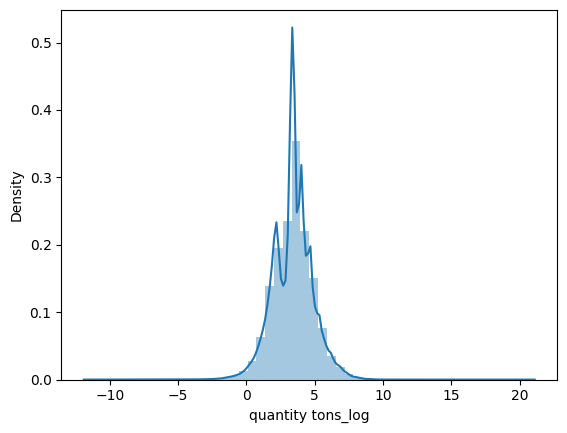

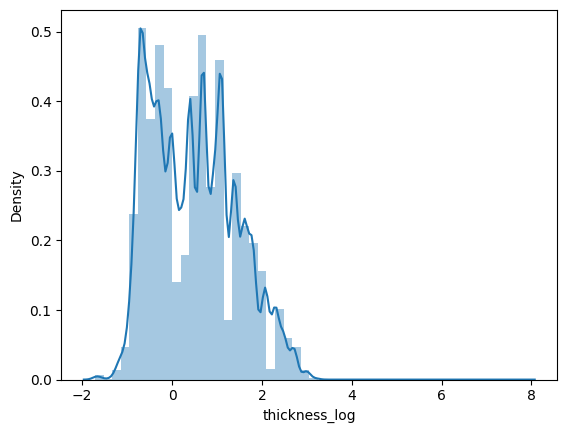

In [16]:
dfr['selling_price_log'] = np.log(dfr['selling_price'])
sns.distplot(dfr['selling_price_log'])
plt.show()

dfr['quantity tons_log'] = np.log(dfr['quantity tons'])
sns.distplot(dfr['quantity tons_log'])
plt.show()

dfr['thickness_log'] = np.log(dfr['thickness'])
sns.distplot(dfr['thickness_log'])
plt.show()
# reverts log
# dfr['reverted_values'] = np.exp(dfr['selling_price_log'])
# sns.distplot(dfr['reverted_values'])
# plt.show()

In [17]:
dfr.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.357842,6.666354,1.386294


In [18]:
#Regression

In [18]:
dfr = dfr.dropna()

In [19]:

# Splitting data into features and target variable
X = dfr[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y = dfr['selling_price_log']

# Display the first few rows of X and y to check the output
print(X.head())  # Show the first few rows of the feature variables
print(y.head())  # Show the first few rows of the target variable

   quantity tons_log status item type  application  thickness_log   width  \
0           3.991779    Won         W         10.0       0.693147  1500.0   
1           6.643822    Won         W         41.0      -0.223144  1210.0   
2           5.956169    Won        WI         28.0      -0.967584   952.0   
3           5.310301    Won         S         59.0       0.832909  1317.0   
4           6.666354    Won         W         10.0       1.386294  2000.0   

   country    customer  product_ref  
0     28.0  30156308.0   1670798778  
1     25.0  30202938.0   1668701718  
2     30.0  30153963.0       628377  
3     32.0  30349574.0   1668701718  
4     28.0  30211560.0       640665  
0    6.749931
1    6.953684
2    6.468211
3    6.643790
4    6.357842
Name: selling_price_log, dtype: float64


In [20]:
from sklearn.preprocessing import OneHotEncoder

# Create the OneHotEncoder instance for 'item type'
ohe = OneHotEncoder(handle_unknown='ignore')
X_ohe = ohe.fit_transform(X[['item type']]).toarray()

# Create the OneHotEncoder instance for 'status'
ohe2 = OneHotEncoder(handle_unknown='ignore')
X_be = ohe2.fit_transform(X[['status']]).toarray()

# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)



In [21]:
# Apply standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Transform and assign back to X

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [22]:
# Model initialization
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
dtr = DecisionTreeRegressor()

models = [lr, rf, gbr, dtr]  # List of models to train

for model in models:
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"{model.__class__.__name__} - Training score: {train_score}, Test score: {test_score}")



LinearRegression - Training score: 0.8512185226575313, Test score: -1.1756616530704181e+24
RandomForestRegressor - Training score: 0.9895248498334119, Test score: 0.9359923697999448
GradientBoostingRegressor - Training score: 0.8896547856047661, Test score: 0.8975207559251943
DecisionTreeRegressor - Training score: 1.0, Test score: 0.8903548469359381


In [23]:
# Hyperparameter tuning for Decision Tree Regressor
param_grid = {
    'max_depth': [2, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instantiate Decision Tree Regressor
dtr = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model1 = grid_search.best_estimator_
y_pred = best_model1.predict(X_test)

# Model evaluation
print("Best hyperparameters:", grid_search.best_params_)
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("R2 Score:", metrics.r2_score(y_test, y_pred))


Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
MSE: 0.03291890420140074
MAE: 0.1324140362931844
R2 Score: 0.8980745093916951


In [ ]:
# Define hyperparameters to tune for Random Forest Regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Retrieve best model
best_model2 = grid_search.best_estimator_

# Evaluate best model on test data
y_pred = best_model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best hyperparameters:", grid_search.best_params_)
print("MSE:", mse)
print("R2 Score:", r2)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Define the parameter grid for GradientBoostingRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the GradientBoostingRegressor model
gbr = GradientBoostingRegressor()

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model3 = grid_search.best_estimator_
y_pred = best_model3.predict(X_test)

# Model evaluation
print("Best hyperparameters:", grid_search.best_params_)
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("R2 Score:", metrics.r2_score(y_test, y_pred))


In [24]:
# ['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model1.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [808.79697526]


In [58]:
import pickle

# Saving the Decision Tree Regressor model
with open('DecisionTreeRegressor.pkl', 'wb') as file:
    pickle.dump(best_model1, file)

# Saving the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Saving the first OrdinalEncoder object
with open('ohe.pkl', 'wb') as f:
    pickle.dump(ohe, f)

# Saving the second OrdinalEncoder object
with open('ohe2.pkl', 'wb') as f:
    pickle.dump(ohe2, f)


In [38]:
dfc = dfr.copy()

In [39]:
dfc = dfr[dfr['status'].isin(['Won', 'Lost'])]
len(dfc)

150427

In [40]:
dfc.status.value_counts()

Won     115996
Lost     34431
Name: status, dtype: int64

In [41]:
dfc = dfc.dropna()

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer


150435

In [43]:
df.status.value_counts()

Won                116004
Lost                34431
Not lost for AM     19568
Revised              4276
To be approved       4167
Draft                3121
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [45]:
dfc = dfr[dfr['status'].isin(['Won', 'Lost'])]
len(dfc)

150427

In [46]:
dfc.status.value_counts()

Won     115996
Lost     34431
Name: status, dtype: int64

In [47]:
# Split data into X (features) and y (target)

X = dfc[['quantity tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref']]

Y = dfc['status']

# Display the first few rows of X and y to check the output
print(X.head())  # Show the first few rows of the feature variables
print(Y.head())  # Show the first few rows of the target variable

   quantity tons_log  selling_price_log item type  application  thickness_log  \
0           3.991779           6.749931         W         10.0       0.693147   
1           6.643822           6.953684         W         41.0      -0.223144   
2           5.956169           6.468211        WI         28.0      -0.967584   
3           5.310301           6.643790         S         59.0       0.832909   
4           6.666354           6.357842         W         10.0       1.386294   

    width  country    customer  product_ref  
0  1500.0     28.0  30156308.0   1670798778  
1  1210.0     25.0  30202938.0   1668701718  
2   952.0     30.0  30153963.0       628377  
3  1317.0     32.0  30349574.0   1668701718  
4  2000.0     28.0  30211560.0       640665  
0    Won
1    Won
2    Won
3    Won
4    Won
Name: status, dtype: object


In [48]:
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
be = LabelBinarizer()
be.fit(Y) 
y = be.fit_transform(Y)
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe), axis=1)


In [49]:
# Apply standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [51]:
import numpy as np

# Check for NaN values in a NumPy array
nan_values = np.isnan(X).any()
print("Does X contain NaN values?", nan_values)


Does X contain NaN values? False


In [52]:
from sklearn.impute import SimpleImputer

# Define the imputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values in X_train and X_test
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Then you can proceed to fit your models using X_train and y_train
# ...
# Your model fitting code here


In [53]:
# Initialize and train classifier models
dtc = DecisionTreeClassifier(max_depth=5, random_state=1)
knn = KNeighborsClassifier(n_neighbors=6)
gbc = GradientBoostingClassifier(n_estimators=30, learning_rate=0.1, random_state=28)
rfc = RandomForestClassifier(n_estimators=20, max_depth=6, random_state=35)
LR = LogisticRegression()

# Train the models
dtc.fit(X_train, y_train)
knn.fit(X_train, y_train)
gbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
LR.fit(X_train, y_train)

# ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=20, random_state=0)
clf.fit(X_train, y_train)

# XGBoost
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, y_train)

# Model evaluation
models = [dtc, knn, gbc, rfc, LR, clf, xgb_model]
for model in models:
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"{model.__class__.__name__} - Training score: {train_score}, Test score: {test_score}")


DecisionTreeClassifier - Training score: 0.8161408573762085, Test score: 0.8118061556870305
KNeighborsClassifier - Training score: 0.903758855818724, Test score: 0.86031155133063
GradientBoostingClassifier - Training score: 0.8200535622708883, Test score: 0.8167253872232932
RandomForestClassifier - Training score: 0.8158749453930749, Test score: 0.8128254559152651
LogisticRegression - Training score: 0.7899010427548482, Test score: 0.786345808681779
ExtraTreesClassifier - Training score: 1.0, Test score: 0.923751911187928
XGBRegressor - Training score: 0.6188679486524264, Test score: 0.5680189004667817


Confusion Matrix:
[[ 8646  1832]
 [ 1609 33042]]


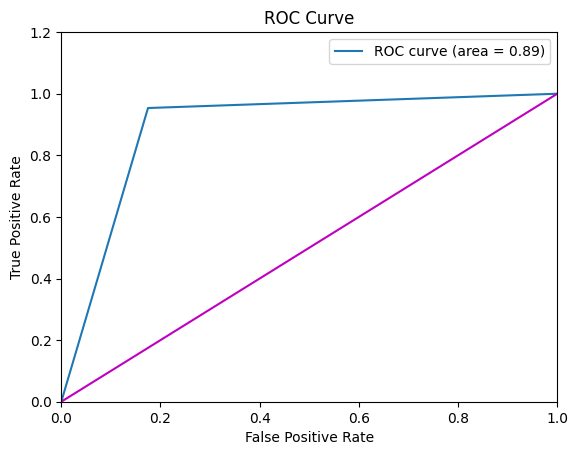

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83     10478
           1       0.95      0.95      0.95     34651

    accuracy                           0.92     45129
   macro avg       0.90      0.89      0.89     45129
weighted avg       0.92      0.92      0.92     45129



In [54]:
# Predict using ExtraTreesClassifier
y_pred = clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'm-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

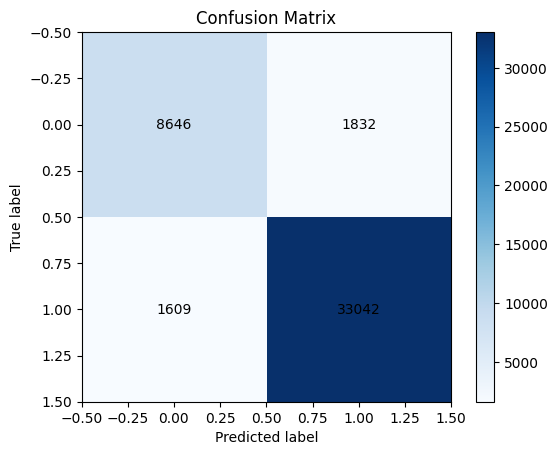

In [55]:


# Calculate confusion matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

plt.ylabel('True label')
plt.xlabel('Predicted label')

for i in range(2):  # Assuming 2 classes (binary classification), adjust if needed
    for j in range(2):
        plt.text(j, i, cm[i, j], horizontalalignment='center', verticalalignment='center')

plt.show()



In [56]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


In [60]:
import pickle

# Save the ExtraTreesClassifier model
with open('extratrees_model.pkl', 'wb') as file:
    pickle.dump(clf, file)

# Save the StandardScaler
with open('scaler_Cl.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Save the OrdinalEncoder
with open('OneHotEncoder.pkl', 'wb') as file:
    pickle.dump(ohe, file)

In [89]:
# Saving the model
# import pickle
# with open('cmodel.pkl', 'wb') as file:
#     pickle.dump(dtc, file)
# with open('cscaler.pkl', 'wb') as f:
#     pickle.dump(scaler, f)
# with open('ct.pkl', 'wb') as f:
#     pickle.dump(ohe, f)

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}
